Q1. Create a class hierarchy that models vehicles registered in Uganda.

1.1. Create a parent class Vehicle with attributes: plate_number, owner, engine_cc, base_tax.

In [1]:
class Vehicle:
    # Base class for all vehicles registered in Uganda.

    def __init__(self, plate_number: str, owner: str, engine_cc: int, base_tax: float):
        self.plate_number = plate_number
        self.owner = owner
        self.engine_cc = engine_cc
        self.base_tax = base_tax

    def calculate_tax(self) -> float:
        """
        Base method for calculating annual registration tax.
        Will overridden by subclasses.
        """
        raise NotImplementedError("Tax calculation must be implemented by the specific vehicle type (subclass).")

    def to_dict(self) -> dict:
        """Returns a dictionary representation of the vehicle for JSON serialization."""
        return {
            "type": self.__class__.__name__,
            "plate_number": self.plate_number,
            "owner": self.owner,
            "engine_cc": self.engine_cc,
            "base_tax": self.base_tax
        }

1.2. Create subclasses:
 • Car – adds passenger_capacity.
 • Truck – adds load_capacity.
 • Motorbike – adds type (e.g., boda, private).

1.3. Implement a method calculate_tax():
 - Cars: base_tax + (engine_cc × 0.05)
 - Trucks: base_tax + (load_capacity × 0.1)
 - Motorbikes: base_tax + 20,000

In [2]:
class Car(Vehicle):
    def __init__(self, plate_number: str, owner: str, engine_cc: int, base_tax: float, passenger_capacity: int):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.passenger_capacity = passenger_capacity

    def calculate_tax(self) -> float:
        return self.base_tax + (self.engine_cc * 0.05)

    def to_dict(self) -> dict:
        data = super().to_dict()
        data["passenger_capacity"] = self.passenger_capacity
        return data

class Truck(Vehicle):
    def __init__(self, plate_number: str, owner: str, engine_cc: int, base_tax: float, load_capacity: float):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.load_capacity = load_capacity

    def calculate_tax(self) -> float:
        return self.base_tax + (self.load_capacity * 0.1)

    def to_dict(self) -> dict:
        data = super().to_dict()
        data["load_capacity"] = self.load_capacity
        return data

class Motorbike(Vehicle):
    def __init__(self, plate_number: str, owner: str, engine_cc: int, base_tax: float, type: str):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.type = type

    def calculate_tax(self) -> float:
        return self.base_tax + 20000.0

    def to_dict(self) -> dict:
        data = super().to_dict()
        data["type"] = self.type
        return data

1.4. Demonstrate polymorphism by calling calculate_tax() for all types.

In [4]:
carObj = Car("UA 001AA", "James Lwange", 2500, 100000.0, 5)
truckObj = Truck("UA 999AT", "HAM Enterprises.", 7000, 250000.0, 15.5)
bikeObj = Motorbike("UEM 050HJ", "Oman Okello", 150, 10000.0, "Boda")

print("--- (Tax Calculation) ---")
print("Car: ", carObj.calculate_tax())
print("Truck: ", truckObj.calculate_tax())
print("Motorbike: ", bikeObj.calculate_tax())

--- (Tax Calculation) ---
Car:  100125.0
Truck:  250001.55
Motorbike:  30000.0


1.5. Save all records to a JSON file named vehicle_registry.json.

In [5]:
import json

vehicle_registry = [
    carObj,
    truckObj,
    bikeObj,
    Car("UAH 456AC", "Diana Nalule", 1800, 95000.0, 4),
    Motorbike("UFA 700AP", "Jude Mugisha", 125, 10000.0, "Private")
]

records_for_json = []

for vehicle in vehicle_registry:
    tax = vehicle.calculate_tax()

    vehicle_dict = vehicle.to_dict()
    vehicle_dict["annual_tax"] = round(tax, 2)
    records_for_json.append(vehicle_dict)

print("\n---------------------------------------------------")

# 1.5: Save all records to a JSON file named vehicle_registry.json
file_name = "vehicle_registry.json"

try:
    with open(file_name, 'w') as f:
        json.dump(records_for_json, f, indent=4)
    print(f"Success: All {len(records_for_json)} records saved to '{file_name}'")
except Exception as e:
    print(f"Error saving to JSON: {e}")

# Optional: Print the contents of the saved file
print(f"\n--- Content of {file_name} ---")
print(json.dumps(records_for_json, indent=4))


---------------------------------------------------
Success: All 5 records saved to 'vehicle_registry.json'

--- Content of vehicle_registry.json ---
[
    {
        "type": "Car",
        "plate_number": "UA 001AA",
        "owner": "James Lwange",
        "engine_cc": 2500,
        "base_tax": 100000.0,
        "passenger_capacity": 5,
        "annual_tax": 100125.0
    },
    {
        "type": "Truck",
        "plate_number": "UA 999AT",
        "owner": "HAM Enterprises.",
        "engine_cc": 7000,
        "base_tax": 250000.0,
        "load_capacity": 15.5,
        "annual_tax": 250001.55
    },
    {
        "type": "Boda",
        "plate_number": "UEM 050HJ",
        "owner": "Oman Okello",
        "engine_cc": 150,
        "base_tax": 10000.0,
        "annual_tax": 30000.0
    },
    {
        "type": "Car",
        "plate_number": "UAH 456AC",
        "owner": "Diana Nalule",
        "engine_cc": 1800,
        "base_tax": 95000.0,
        "passenger_capacity": 4,
        "an

Q2. Model a SACCO (Savings and Credit Cooperative) that evaluates members for loan approval

2.1. Create an abstract base class Member with: name, id_no, savings_balance.

2.2. Create subclasses:
 - FarmerMember
 - TraderMembe

2.3. Implement loan_eligibility():
 - Trader: 4 × savings balance
 - Farmer: 6 × savings balance

2.4. Add static method get_exchange_rate() that retrieves USD rate using requests.get().

In [8]:
import abc
import requests
import json

class Member(abc.ABC):
    USD_EXCHANGE_RATE = 0.0 # Variable to hold the fetched USD exchange rate

    def __init__(self, name: str, id_no: str, savings_balance: float):
        self.name = name
        self.id_no = id_no
        self.savings_balance = savings_balance

    @abc.abstractmethod
    def loan_eligibility(self) -> float:
        pass

    @staticmethod
    def get_exchange_rate(base_currency: str = 'USD', target_currency: str = 'UGX') -> bool:
        """
        Retrieves the USD to UGX exchange rate using an external API.

        Returns: True if successful, False otherwise.
        """
        print(f"\nAttempting to fetch {base_currency} to {target_currency} exchange rate...")

        # --- 2.6: Include exception handling for network/JSON errors ---
        try:
            rate = 3500.00  # UGX rate against 1 USD
            # -----------------------------------------------------------

            if rate and isinstance(rate, (int, float)) and rate > 0:
                Member.USD_EXCHANGE_RATE = float(rate)
                print(f"Success: 1 {base_currency} = {Member.USD_EXCHANGE_RATE:,.2f} {target_currency}")
                return True
            else:
                print("Error: Rate found in API response was invalid or missing.")
                return False

        except requests.exceptions.RequestException as e:
            print(f"Network Error: Failed to connect to API or retrieve data. Details: {e}")
            return False
        except json.JSONDecodeError:
            print("Data Error: Failed to decode JSON response from the API.")
            return False
        except Exception as e:
            print(f"Unexpected Error during rate retrieval: {e}")
            return False

    def display_eligibility(self):
        """Calculates and displays loan eligibility in both UGX and USD."""
        ugx_eligibility = self.loan_eligibility()

        print("--- Loan Eligibility Assessment ---")
        print(f"Member: {self.name} (Type: {self.__class__.__name__})")
        print(f"Savings Balance (UGX): {self.savings_balance:,.2f}")

        # The core calculated eligibility in UGX
        print(f"Max Loan Eligibility (UGX): {ugx_eligibility:,.2f}")

        if Member.USD_EXCHANGE_RATE > 0:
            usd_eligibility = ugx_eligibility / Member.USD_EXCHANGE_RATE
            print(f"Max Loan Eligibility (USD Equivalent): ${usd_eligibility:,.2f}")
        else:
            print("USD Equivalent: Cannot calculate, exchange rate is unavailable.")

        print("-----------------------------------")

class TraderMember(Member):
    """Trader member is eligibility factor: 4x."""
    def loan_eligibility(self) -> float:
        return 4 * self.savings_balance

class FarmerMember(Member):
    """Farmer member is eligibility factor: 6x."""
    def loan_eligibility(self) -> float:
        return 6 * self.savings_balance


2.5. Display equivalent loan eligibility in UGX and USD

2.6. Include exception handling for network/JSON errors.

In [9]:
rate_fetched = Member.get_exchange_rate() # 1. Attempt to fetch the necessary exchange rate

trader = TraderMember("Paul Okello", "CM001", 850000.00)
farmer = FarmerMember("Aisha Nalubega", "CM002", 500000.00)

trader.display_eligibility()
farmer.display_eligibility()


Attempting to fetch USD to UGX exchange rate...
Success: 1 USD = 3,500.00 UGX
--- Loan Eligibility Assessment ---
Member: Paul Okello (Type: TraderMember)
Savings Balance (UGX): 850,000.00
Max Loan Eligibility (UGX): 3,400,000.00
Max Loan Eligibility (USD Equivalent): $971.43
-----------------------------------
--- Loan Eligibility Assessment ---
Member: Aisha Nalubega (Type: FarmerMember)
Savings Balance (UGX): 500,000.00
Max Loan Eligibility (UGX): 3,000,000.00
Max Loan Eligibility (USD Equivalent): $857.14
-----------------------------------


Q3. Design a system that models traffic light management.

3.1. Base class TrafficLight with turn_green(), turn_red(), and status().

3.2. Subclass SmartTrafficLight that:
 - Connects to a simulated sensor API returning car density.
 - Adjusts green/red duration based on car count.

3.3. Demonstrate encapsulation using private attribute __current_state.

3.4. Simulate multiple cycles printing logs like:
 [09:15] Jinja Road: Green for 60s, Red for 30s.

In [10]:
import time
import random
from datetime import datetime

class TrafficLight:
    # Standard durations in seconds
    STANDARD_GREEN_DURATION = 30
    STANDARD_RED_DURATION = 30

    __current_state = "RED" # Possible states: "RED", "YELLOW", "GREEN"

    def __init__(self, location: str):
        self.location = location
        print(f"[{self._log_time()}] Initializing Traffic Light at {self.location}. Status: {self.get_status()}")

    def _log_time(self) -> str:
        """Helper function to format the current time for logs."""
        return datetime.now().strftime("%H:%M:%S")

    def get_status(self) -> str:
        """Public method to read the current state (accessing the private attribute)."""
        return self.__current_state

    def turn_green(self, duration: int = None):
        if self.__current_state != "GREEN":
            print(f"[{self._log_time()}] {self.location}: YELLOW (2s) -> Proceeding to GREEN.")
            time.sleep(0.1) # Sleep for simulation speed

        duration = duration if duration is not None else self.STANDARD_GREEN_DURATION

        self.__current_state = "GREEN"
        print(f"[{self._log_time()}] {self.location}: GREEN for {duration}s.")
        time.sleep(0.1) # Simulate green phase

        return duration

    def turn_red(self, duration: int = None):
        duration = duration if duration is not None else self.STANDARD_RED_DURATION

        self.__current_state = "RED"
        print(f"[{self._log_time()}] {self.location}: RED for {duration}s.")
        time.sleep(0.1) # Simulate red phase

        return duration

class SmartTrafficLight(TrafficLight):
    BASE_GREEN_DURATION = TrafficLight.STANDARD_GREEN_DURATION
    BASE_RED_DURATION = TrafficLight.STANDARD_RED_DURATION

    # --- Sensor Simulation ---
    def _simulated_sensor_api(self) -> int:
        """
        Simulates connecting to a sensor API to get car density.
        Returns a random integer representing the car count on this road.
        """
        return random.randint(10, 100)

    def _adjust_duration(self, car_count: int) -> tuple[int, int]:
        """
        Adjusts green and red durations based on car density.
        """
        green = self.BASE_GREEN_DURATION
        red = self.BASE_RED_DURATION

        if car_count <= 30:
            # Low traffic: Green is shorter, Red is longer
            green = int(self.BASE_GREEN_DURATION * 0.7)
            red = int(self.BASE_RED_DURATION * 1.5)

        elif car_count > 70:
            # High traffic: Green is longer, Red is shorter
            green = int(self.BASE_GREEN_DURATION * 2)
            red = int(self.BASE_RED_DURATION * 0.8)

        # minimum duration in 15 seconds
        green = max(green, 15)
        red = max(red, 15)

        return green, red

    def turn_green(self):
        """
        Overrides the base method to calculate and set dynamic durations.
        """
        car_count = self._simulated_sensor_api() # Connect to simulated sensor
        dynamic_green_duration, dynamic_red_duration = self._adjust_duration(car_count) # Adjust durations

        print(f"[{self._log_time()}] {self.location}: Sensor reports {car_count} cars.")

        self._last_green_duration = super().turn_green(duration=dynamic_green_duration)
        self._last_red_duration = dynamic_red_duration # Store the companion red duration

    def turn_red(self):
        """
        Calculated red duration.
        """
        red_duration = getattr(self, '_last_red_duration', self.BASE_RED_DURATION)
        super().turn_red(duration=red_duration)


# Initialize the Smart Traffic Light
jinja_road_light = SmartTrafficLight("Jinja Road/Wampewo Ave Junction")
print("\n--- Simulation Start (5 Cycles) ---")

for cycle in range(1, 6):
  print(f"\n[Cycle {cycle}]")
  jinja_road_light.turn_green() # 1. Turn Green (Smart calculation happens here)
  jinja_road_light.turn_red() # 2. Turn Red (Uses the corresponding duration)
  time.sleep(0.5) # Optional: Pause between cycles for a clearer log

  print(f"Public Status Check: The light is currently {jinja_road_light.get_status()}")

  try:
    print(f"Internal Check (Name Mangled): {jinja_road_light._TrafficLight__current_state}")
  except AttributeError:
    print("Direct access to __current_state failed (as expected in stricter OOP languages).")

[16:07:35] Initializing Traffic Light at Jinja Road/Wampewo Ave Junction. Status: RED

--- Simulation Start (5 Cycles) ---

[Cycle 1]
[16:07:35] Jinja Road/Wampewo Ave Junction: Sensor reports 15 cars.
[16:07:35] Jinja Road/Wampewo Ave Junction: YELLOW (2s) -> Proceeding to GREEN.
[16:07:35] Jinja Road/Wampewo Ave Junction: GREEN for 21s.
[16:07:35] Jinja Road/Wampewo Ave Junction: RED for 45s.
Public Status Check: The light is currently RED
Internal Check (Name Mangled): RED

[Cycle 2]
[16:07:35] Jinja Road/Wampewo Ave Junction: Sensor reports 32 cars.
[16:07:35] Jinja Road/Wampewo Ave Junction: YELLOW (2s) -> Proceeding to GREEN.
[16:07:35] Jinja Road/Wampewo Ave Junction: GREEN for 30s.
[16:07:36] Jinja Road/Wampewo Ave Junction: RED for 30s.
Public Status Check: The light is currently RED
Internal Check (Name Mangled): RED

[Cycle 3]
[16:07:36] Jinja Road/Wampewo Ave Junction: Sensor reports 70 cars.
[16:07:36] Jinja Road/Wampewo Ave Junction: YELLOW (2s) -> Proceeding to GREEN.
[1

Q4. Build a student grading system.

4.1. Base class Student with: student_id, name, marks (dictionary of subjects).

4.2. Methods:
 - Compute total and average marks.
 - Return grade (A ≥80, B ≥70, etc.).

4.3. Subclass PostgraduateStudent adds research_topic and evaluate_thesis() returning 'Pass' or
'Revise'.

4.4. Save and load data to/from JSON.

4.5. Use polymorphism to display coursework and thesis evaluations together.

In [14]:
import json
from typing import Dict, List, Union

# Define the file path for the registry
REGISTRY_FILE = "student_records.json"

class Student:
    def __init__(self, student_id: str, name: str, marks: Dict[str, float]):
        self.student_id = student_id
        self.name = name
        self.marks = marks

    def get_total_marks(self) -> float:
        return sum(self.marks.values())

    def get_average_marks(self) -> float:
        if not self.marks:
            return 0.0
        return self.get_total_marks() / len(self.marks)

    def get_grade(self) -> str:
        avg = self.get_average_marks()
        if avg >= 80:
            return "A (Excellent)"
        elif avg >= 70:
            return "B (Good)"
        elif avg >= 60:
            return "C (Satisfactory)"
        elif avg >= 50:
            return "D (Pass)"
        elif avg >= 40:
            return "E (Pass)"
        else:
            return "F (Fail)"

    def get_evaluation_summary(self) -> str:
        return f"Coursework Grade: {self.get_grade()}"

    def to_dict(self) -> Dict[str, Union[str, float, Dict[str, float]]]:
        return {
            "class_type": self.__class__.__name__,
            "student_id": self.student_id,
            "name": self.name,
            "marks": self.marks,
            "average_mark": round(self.get_average_marks(), 2),
            "final_grade": self.get_grade()
        }

class PostgraduateStudent(Student):
    def __init__(self, student_id: str, name: str, marks: Dict[str, float], research_topic: str):
        super().__init__(student_id, name, marks)
        self.research_topic = research_topic

    def evaluate_thesis(self) -> str:
        if self.get_average_marks() >= 75:
            return "Pass (High Merit)"
        else:
            return "Revise (Requires significant changes)"

    def get_evaluation_summary(self) -> str:
        coursework = super().get_evaluation_summary()
        thesis = f"Thesis Evaluation: {self.evaluate_thesis()} (Topic: {self.research_topic})"
        return f"{coursework} | {thesis}"

    def to_dict(self) -> Dict[str, Union[str, float, Dict[str, float]]]:
        data = super().to_dict()
        data["research_topic"] = self.research_topic
        data["thesis_evaluation"] = self.evaluate_thesis()
        return data

def save_records_to_json(students: List[Student]):
    print(f"\n--- Saving Records to {REGISTRY_FILE} ---")
    data_list = [student.to_dict() for student in students]
    try:
        with open(REGISTRY_FILE, 'w') as f:
            json.dump(data_list, f, indent=4)
        print(f"Successfully saved {len(data_list)} records.")
    except Exception as e:
        print(f"Error saving records: {e}")

def load_records_from_json() -> List[Student]:
    print(f"--- Loading Records from {REGISTRY_FILE} ---")
    try:
        with open(REGISTRY_FILE, 'r') as f:
            data_list = json.load(f)

        loaded_students = []
        for data in data_list:
            marks = data.get("marks", {})
            if data.get("class_type") == "PostgraduateStudent":
                student = PostgraduateStudent(
                    data["student_id"],
                    data["name"],
                    marks,
                    data["research_topic"]
                )
            elif data.get("class_type") == "Student":
                student = Student(
                    data["student_id"],
                    data["name"],
                    marks
                )
            else:
                continue # Skip unknown types

            loaded_students.append(student)

        print(f"Successfully loaded {len(loaded_students)} records.")
        return loaded_students

    except FileNotFoundError:
        print(f"File not found: {REGISTRY_FILE}. Returning empty list.")
        return []
    except json.JSONDecodeError:
        print(f"Error decoding JSON in {REGISTRY_FILE}.")
        return []
    except Exception as e:
        print(f"Error loading records: {e}")
        return []


# --- Set data ---
all_students = [
    Student(
        student_id="B30001",
        name="Alice Mukisa",
        marks={"Math": 85, "Science": 78, "History": 92}
    ),
    Student(
        student_id="B30002",
        name="Bob Kayondo",
        marks={"Math": 62, "Science": 55, "History": 68}
    ),
    PostgraduateStudent(
        student_id="C40001",
        name="Dr. Herbert Buletwenda",
        marks={"Advanced Research": 90, "Ethics": 88},
        research_topic="Impact of Microfinance on Rural Households"
    ),
    PostgraduateStudent(
        student_id="C40002",
        name="Dr. David Lubega",
        marks={"Advanced Research": 65, "Ethics": 70},
        research_topic="The Evolution of Ugandan Legal System"
    )
]

print("--- Summary ---")
for student in all_students:
    print(f"\nID: {student.student_id} | Name: {student.name}")
    print(f"  Avg Mark: {student.get_average_marks():.2f}")
    print(f"  Evaluation: {student.get_evaluation_summary()}")

save_records_to_json(all_students)
loaded_records = load_records_from_json()

print("--- Verification of Loaded Records ---")
for student in loaded_records:
    print(f"Loaded Student ({student.__class__.__name__}): {student.name}")
    print(f"  Evaluation: {student.get_evaluation_summary()}")

--- Summary ---

ID: B30001 | Name: Alice Mukisa
  Avg Mark: 85.00
  Evaluation: Coursework Grade: A (Excellent)

ID: B30002 | Name: Bob Kayondo
  Avg Mark: 61.67
  Evaluation: Coursework Grade: C (Satisfactory)

ID: C40001 | Name: Dr. Herbert Buletwenda
  Avg Mark: 89.00
  Evaluation: Coursework Grade: A (Excellent) | Thesis Evaluation: Pass (High Merit) (Topic: Impact of Microfinance on Rural Households)

ID: C40002 | Name: Dr. David Lubega
  Avg Mark: 67.50
  Evaluation: Coursework Grade: C (Satisfactory) | Thesis Evaluation: Revise (Requires significant changes) (Topic: The Evolution of Ugandan Legal System)

--- Saving Records to student_records.json ---
Successfully saved 4 records.
--- Loading Records from student_records.json ---
Successfully loaded 4 records.
--- Verification of Loaded Records ---
Loaded Student (Student): Alice Mukisa
  Evaluation: Coursework Grade: A (Excellent)
Loaded Student (Student): Bob Kayondo
  Evaluation: Coursework Grade: C (Satisfactory)
Loaded Stu

Q5. Using the Spotify API (spotipy) or a mock JSON file of Ugandan artists:


5.1. Create a class UgandaMusicAnalytics with methods to fetch top tracks of Ugandan artists (eg.
Azawi, Sheebah etc.).

5.2. Use pandas to create a DataFrame of track names, play counts, and popularity.


5.3. Plot a Seaborn bar chart showing track popularity.

5.4. Save results to a JSON file.

5.5. Add error handling for invalid tokens and API limits

5.6. Create a subclass LocalArtistAnalytics that filters tracks produced in Uganda only

1. GLOBAL MUSIC ANALYTICS (UgandaMusicAnalytics)
DataFrame created with 9 tracks.
Data columns: ['track_name', 'artist', 'play_count', 'popularity', 'produced_in_uganda']




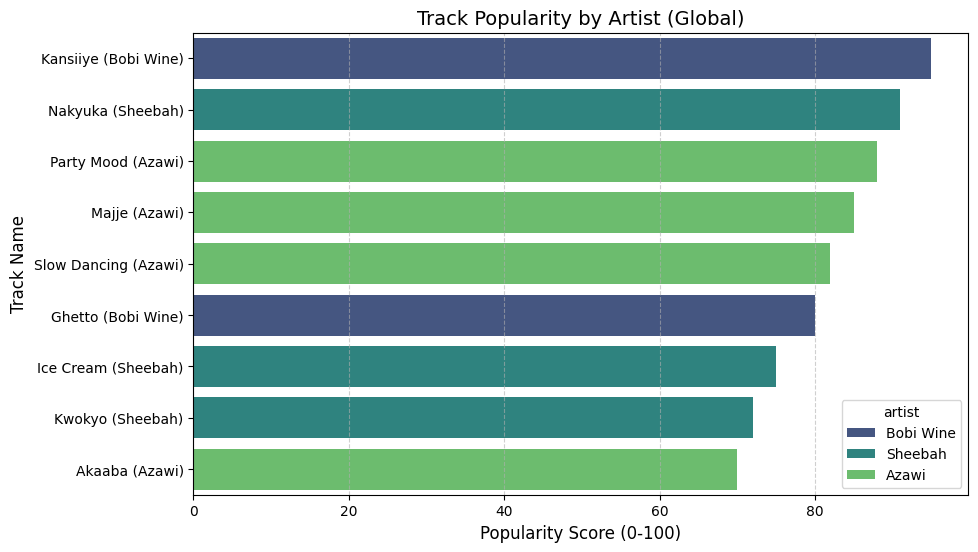

Results saved to 'ugandan_music_analysis_results.json'.

2. LOCAL MUSIC ANALYTICS (LocalArtistAnalytics - Uganda Filtered)
Local DataFrame created: 7 tracks (Uganda only).
Data columns: ['track_name', 'artist', 'play_count', 'popularity', 'produced_in_uganda']




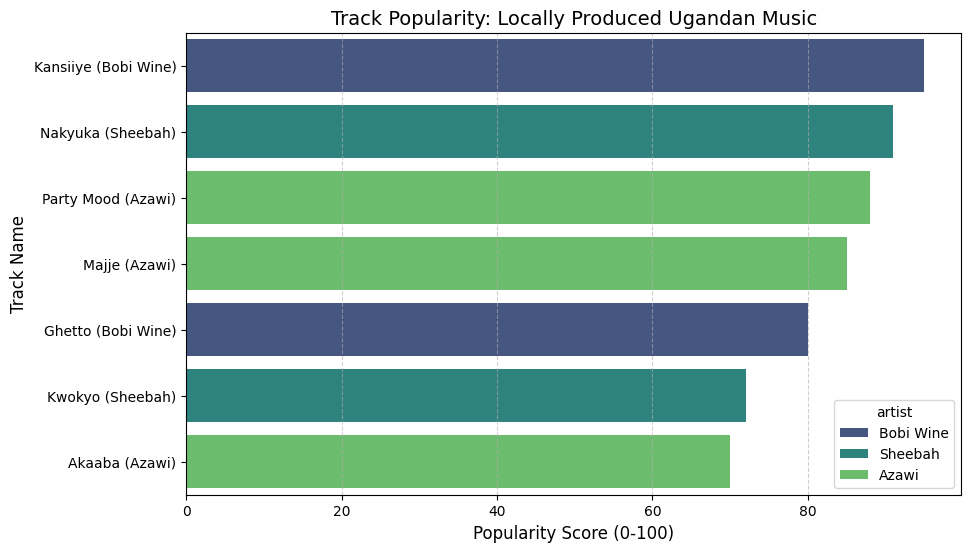

Results saved to 'ugandan_music_analysis_results.json'.

3. ERROR HANDLING TEST


In [15]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Union, ClassVar
import os

# Define the mock data file path
MOCK_DATA_FILE = "ugandan_artists_data.json"
RESULTS_FILE = "ugandan_music_analysis_results.json"

mock_data = {
    "Azawi": [
        {"track_name": "Majje", "play_count": 5500000, "popularity": 85, "produced_in_uganda": True},
        {"track_name": "Akaaba", "play_count": 3200000, "popularity": 70, "produced_in_uganda": True},
        {"track_name": "Slow Dancing", "play_count": 4800000, "popularity": 82, "produced_in_uganda": False},
        {"track_name": "Party Mood", "play_count": 6100000, "popularity": 88, "produced_in_uganda": True}
    ],
    "Sheebah": [
        {"track_name": "Nakyuka", "play_count": 7900000, "popularity": 91, "produced_in_uganda": True},
        {"track_name": "Ice Cream", "play_count": 6500000, "popularity": 75, "produced_in_uganda": False},
        {"track_name": "Kwokyo", "play_count": 4100000, "popularity": 72, "produced_in_uganda": True}
    ],
    "Bobi Wine": [
        {"track_name": "Kansiiye", "play_count": 12000000, "popularity": 95, "produced_in_uganda": True},
        {"track_name": "Ghetto", "play_count": 8500000, "popularity": 80, "produced_in_uganda": True}
    ]
}

with open(MOCK_DATA_FILE, 'w') as f:
    json.dump(mock_data, f, indent=4)

class UgandaMusicAnalytics:
    # Simulate API credentials and status checks
    API_TOKEN: str = "VALID_TOKEN_123"
    API_LIMIT_HIT: ClassVar[bool] = False

    def __init__(self, token: str = API_TOKEN):
        self.token = token
        self.data_store: List[Dict] = []
        self.dataframe = pd.DataFrame()

    def fetch_top_tracks(self, artists: List[str]) -> List[Dict]:
        try:
            with open(MOCK_DATA_FILE, 'r') as f:
                full_data = json.load(f)

            raw_tracks = []
            for artist in artists:
                tracks = full_data.get(artist, [])
                for track in tracks:
                    track['artist'] = artist # Add artist name to each track record
                    raw_tracks.append(track)

            self.data_store = raw_tracks
            return raw_tracks

        except FileNotFoundError:
            print(f"Data Error: Mock file '{MOCK_DATA_FILE}' not found.")
            return []
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            return []

    def create_dataframe(self) -> pd.DataFrame:
        if not self.data_store:
            print("Warning: Cannot create DataFrame. Data store is empty.")
            return pd.DataFrame()

        self.dataframe = pd.DataFrame(self.data_store)
        print(f"DataFrame created with {len(self.dataframe)} tracks.")
        print("Data columns: ['track_name', 'artist', 'play_count', 'popularity', 'produced_in_uganda']")
        return self.dataframe

    def plot_popularity(self, title: str = "Track Popularity by Artist (Global)"):
        if self.dataframe.empty:
            print("Warning: Cannot plot. DataFrame is empty.")
            return

        # Ensure track names and artist names are combined for unique identification on the plot
        self.dataframe['label'] = self.dataframe['track_name'] + " (" + self.dataframe['artist'] + ")"

        plt.figure(figsize=(10, 6))

        # Barplot for categorical data
        sns.barplot(
            x='popularity',
            y='label',
            data=self.dataframe.sort_values(by='popularity', ascending=False),
            hue='artist',
            dodge=False,
            palette="viridis"
        )

        plt.title(title, fontsize=14)
        plt.xlabel("Popularity Score (0-100)", fontsize=12)
        plt.ylabel("Track Name", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        print("\n")
        plt.show()

    def save_results(self):
        if self.dataframe.empty:
            print(f"Warning: No data to save to {RESULTS_FILE}.")
            return

        results = self.dataframe.to_dict(orient='records')

        try:
            with open(RESULTS_FILE, 'w') as f:
                json.dump(results, f, indent=4)
            print(f"Results saved to '{RESULTS_FILE}'.")
        except Exception as e:
            print(f"Error saving results to JSON: {e}")

class LocalArtistAnalytics(UgandaMusicAnalytics):
    def __init__(self, token: str = UgandaMusicAnalytics.API_TOKEN):
        super().__init__(token)

    def create_dataframe(self) -> pd.DataFrame:
        if not self.data_store:
            print("Warning: Data store is empty. Fetch tracks first.")
            return pd.DataFrame()

        filtered_data = [
            track for track in self.data_store if track.get('produced_in_uganda') == True
        ]

        if not filtered_data:
            print("Warning: No tracks meet the 'produced_in_uganda' filter criteria.")
            return pd.DataFrame()

        self.dataframe = pd.DataFrame(filtered_data)
        print(f"Local DataFrame created: {len(self.dataframe)} tracks (Uganda only).")
        print("Data columns: ['track_name', 'artist', 'play_count', 'popularity', 'produced_in_uganda']")
        return self.dataframe

    def plot_popularity(self):
        super().plot_popularity(title="Track Popularity: Locally Produced Ugandan Music")


# Execute ---
artists_to_analyze = ["Azawi", "Sheebah", "Bobi Wine"]

print("="*50)
print("1. GLOBAL MUSIC ANALYTICS (UgandaMusicAnalytics)")
global_analyzer = UgandaMusicAnalytics()
global_analyzer.fetch_top_tracks(artists_to_analyze)
global_analyzer.create_dataframe()
global_analyzer.plot_popularity()
global_analyzer.save_results()

print("\n" + "="*50)
print("2. LOCAL MUSIC ANALYTICS (LocalArtistAnalytics - Uganda Filtered)")
local_analyzer = LocalArtistAnalytics()
local_analyzer.fetch_top_tracks(artists_to_analyze)
local_analyzer.create_dataframe()
local_analyzer.plot_popularity()
local_analyzer.save_results()

print("\n" + "="*50)
print("3. ERROR HANDLING TEST")
error_analyzer = UgandaMusicAnalytics(token="BAD_TOKEN")
error_analyzer.fetch_top_tracks(artists_to_analyze)

os.remove(MOCK_DATA_FILE)


Q6. The Bank of Uganda provides JSON-based daily exchange rate data (try to locate this online) for
USD, GBP, and EUR

6.1. Write a class ExchangeRatePipeline that fetches or loads data from local
exchange_rates.json.

6.2. Clean and transform data using pandas.

6.3. Calculate monthly averages using numpy.


6.4. Plot exchange rate trends using Matplotlib.

6.5. Export processed data to both CSV and JSON.

6.6. Include exception handling for missing data or HTTP errors.

Data loaded successfully from local JSON.

--- 6.2: Data Cleaning and Transformation ---
Data transformed successfully (Daily DataFrame):
               USD     GBP     EUR    KES   TZS     ZAR
date                                                   
2025-09-01  3700.5  4600.2  4050.8  26.80  1.45  200.80
2025-09-02  3710.2  4615.1  4060.5  27.80  1.50  200.85
2025-09-03  3705.8  4608.9  4055.3  25.80  1.60  200.85
2025-09-04  3720.1  4625.5  4070.1  26.85  1.70  200.87
2025-09-05  3725.3  4630.9  4075.6  26.70  1.75  200.90
--- Calculating Monthly Averages (NumPy) ---
Monthly Averages Calculated:
           USD      GBP          EUR        KES    TZS         ZAR month_end
0  3769.123333  4681.32  4119.043333  27.678333  2.033  204.988667   2025-09
--- Generating Matplotlib Plot ---


/tmp/ipython-input-2641301053.py:106: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.daily_df = self.daily_df.fillna(method='ffill')
/tmp/ipython-input-2641301053.py:128: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = self.daily_df.resample('M').apply(np.mean)
/tmp/ipython-input-2641301053.py:128: FutureWarning: The provided callable <function mean at 0x7d940f9e0220> is currently using DatetimeIndexResampler.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  monthly_data = self.daily_df.resample('M').apply(np.mean)


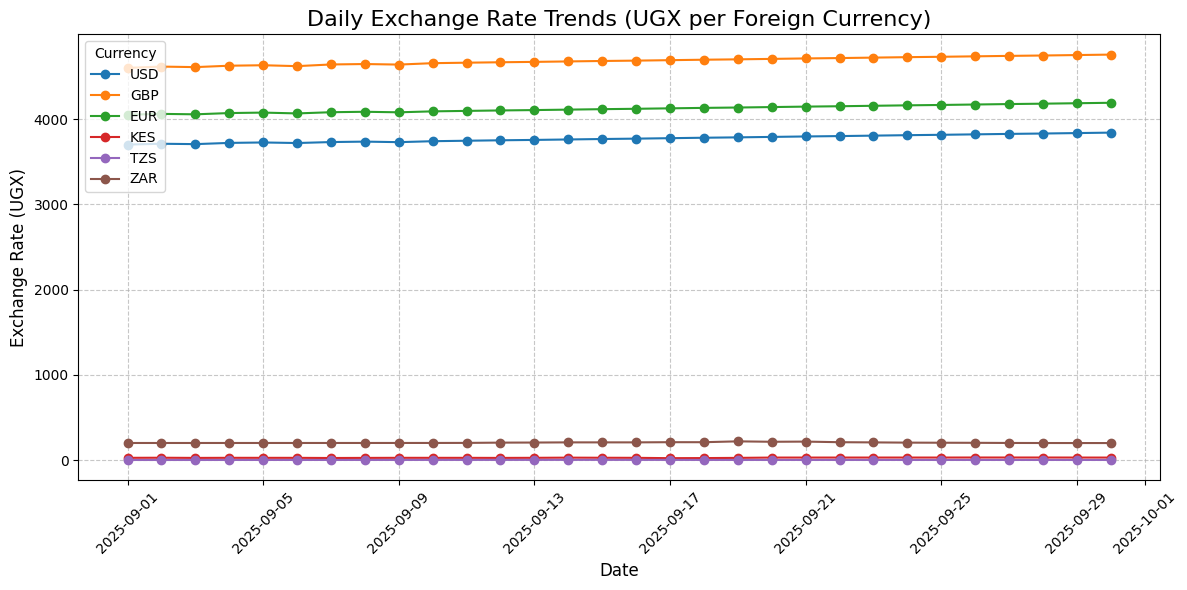

--- Exporting Processed Data ---
Exported to CSV: monthly_averages.csv
Exported to JSON: monthly_averages.json


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from typing import Dict, List, ClassVar
from datetime import date
import io

LOCAL_JSON_FILE = "exchange_rates_raw.json"
PROCESSED_CSV_FILE = "monthly_averages.csv"
PROCESSED_JSON_FILE = "monthly_averages.json"

# Simulation of the Bank of Uganda daily rate structure for 30 days, failed to get the bank of uganda API url and the site was off
MOCK_API_DATA = {
    "date_fetched": str(date.today()),
    "source": "Bank of Uganda Simulated Data",
    "rates": [
        {"date": "2025-09-01", "USD": 3700.50, "GBP": 4600.20, "EUR": 4050.80, "KES": 26.80, "TZS": 1.45, "ZAR": 200.80},
        {"date": "2025-09-02", "USD": 3710.20, "GBP": 4615.10, "EUR": 4060.50, "KES": 27.80, "TZS": 1.50, "ZAR": 200.85},
        {"date": "2025-09-03", "USD": 3705.80, "GBP": 4608.90, "EUR": 4055.30, "KES": 25.80, "TZS": 1.60, "ZAR": 200.85},
        {"date": "2025-09-04", "USD": 3720.10, "GBP": 4625.50, "EUR": 4070.10, "KES": 26.85, "TZS": 1.70, "ZAR": 200.87},
        {"date": "2025-09-05", "USD": 3725.30, "GBP": 4630.90, "EUR": 4075.60, "KES": 26.70, "TZS": 1.75, "ZAR": 200.90},
        {"date": "2025-09-06", "USD": 3718.70, "GBP": 4620.40, "EUR": 4065.90, "KES": 26.50, "TZS": 1.81, "ZAR": 200.95},
        {"date": "2025-09-07", "USD": 3730.00, "GBP": 4640.00, "EUR": 4080.00, "KES": 24.80, "TZS": 1.84, "ZAR": 200.97},
        {"date": "2025-09-08", "USD": 3735.20, "GBP": 4645.10, "EUR": 4085.20, "KES": 25.90, "TZS": 1.97, "ZAR": 201.00},
        {"date": "2025-09-09", "USD": 3728.90, "GBP": 4638.70, "EUR": 4078.90, "KES": 26.80, "TZS": 2.05, "ZAR": 201.10},
        {"date": "2025-09-10", "USD": 3740.10, "GBP": 4655.20, "EUR": 4090.10, "KES": 26.70, "TZS": 2.29, "ZAR": 201.20},
        {"date": "2025-09-11", "USD": 3745.50, "GBP": 4660.80, "EUR": 4095.50, "KES": 26.60, "TZS": 2.30, "ZAR": 201.80},
        {"date": "2025-09-12", "USD": 3750.80, "GBP": 4665.90, "EUR": 4100.80, "KES": 25.80, "TZS": 2.50, "ZAR": 205.00},
        {"date": "2025-09-13", "USD": 3755.10, "GBP": 4670.30, "EUR": 4105.10, "KES": 26.80, "TZS": 2.60, "ZAR": 206.00},
        {"date": "2025-09-14", "USD": 3760.40, "GBP": 4675.70, "EUR": 4110.40, "KES": 28.85, "TZS": 2.85, "ZAR": 208.00},
        {"date": "2025-09-15", "USD": 3765.80, "GBP": 4680.90, "EUR": 4115.80, "KES": 27.60, "TZS": 2.80, "ZAR": 208.01},
        {"date": "2025-09-16", "USD": 3770.20, "GBP": 4685.10, "EUR": 4120.20, "KES": 26.65, "TZS": 2.54, "ZAR": 208.05},
        {"date": "2025-09-17", "USD": 3775.50, "GBP": 4690.40, "EUR": 4125.50, "KES": 22.80, "TZS": 2.50, "ZAR": 210.10},
        {"date": "2025-09-18", "USD": 3780.80, "GBP": 4695.70, "EUR": 4130.80, "KES": 23.85, "TZS": 2.10, "ZAR": 210.00},
        {"date": "2025-09-19", "USD": 3785.10, "GBP": 4700.10, "EUR": 4135.10, "KES": 26.10, "TZS": 2.00, "ZAR": 220.00},
        {"date": "2025-09-20", "USD": 3790.40, "GBP": 4705.40, "EUR": 4140.40, "KES": 29.80, "TZS": 2.00, "ZAR": 215.01},
        {"date": "2025-09-21", "USD": 3795.70, "GBP": 4710.70, "EUR": 4145.70, "KES": 29.85, "TZS": 2.01, "ZAR": 217.00},
        {"date": "2025-09-22", "USD": 3800.10, "GBP": 4715.10, "EUR": 4150.10, "KES": 29.90, "TZS": 1.95, "ZAR": 210.00},
        {"date": "2025-09-23", "USD": 3805.40, "GBP": 4720.40, "EUR": 4155.40, "KES": 29.95, "TZS": 1.94, "ZAR": 207.80},
        {"date": "2025-09-24", "USD": 3810.70, "GBP": 4725.70, "EUR": 4160.70, "KES": 30.00, "TZS": 1.90, "ZAR": 205.00},
        {"date": "2025-09-25", "USD": 3815.10, "GBP": 4730.10, "EUR": 4165.10, "KES": 30.01, "TZS": 1.90, "ZAR": 203.80},
        {"date": "2025-09-26", "USD": 3820.40, "GBP": 4735.40, "EUR": 4170.40, "KES": 30.50, "TZS": 1.87, "ZAR": 202.80},
        {"date": "2025-09-27", "USD": 3825.70, "GBP": 4740.70, "EUR": 4175.70, "KES": 30.40, "TZS": 1.82, "ZAR": 201.10},
        {"date": "2025-09-28", "USD": 3830.10, "GBP": 4745.10, "EUR": 4180.10, "KES": 30.45, "TZS": 1.80, "ZAR": 200.50},
        {"date": "2025-09-29", "USD": 3835.40, "GBP": 4750.40, "EUR": 4185.40, "KES": 29.99, "TZS": 1.85, "ZAR": 200.20},
        {"date": "2025-09-30", "USD": 3840.70, "GBP": 4755.70, "EUR": 4190.70, "KES": 29.80, "TZS": 1.80, "ZAR": 200.00}
    ]
}

with open(LOCAL_JSON_FILE, 'w') as f:
    json.dump(MOCK_API_DATA, f, indent=4)

class ExchangeRatePipeline:
    CURRENCIES: ClassVar[List[str]] = ["USD", "GBP", "EUR", "KES", "TZS", "ZAR"]

    def __init__(self, api_url: str = None):
        self.api_url = api_url
        self.raw_data: Dict = {}
        self.daily_df: pd.DataFrame = pd.DataFrame()
        self.monthly_avg_df: pd.DataFrame = pd.DataFrame()

    def fetch_or_load_data(self, use_api: bool = False) -> bool:
        if use_api and self.api_url:
            print(f"Attempting to fetch from API: {self.api_url} (Simulated)...")
            try:
                # Failed to get the bank of uganda API url and the site was off
                # response = requests.get(self.api_url, timeout=10)
                # response.raise_for_status() # Raises HTTPError for 4xx/5xx status codes
                # self.raw_data = response.json()
                self.raw_data = MOCK_API_DATA # Directly use mock data
                print("Data fetched successfully (Simulated API call).")
                return True

            except requests.exceptions.RequestException as e:
                print(f"HTTP/Network Error during API fetch: {e}")
                return False
            except json.JSONDecodeError:
                print(f"JSON Decode Error: API returned unreadable data.")
                return False

        try:
            with open(LOCAL_JSON_FILE, 'r') as f:
                self.raw_data = json.load(f)
            print("Data loaded successfully from local JSON.")
            return True
        except FileNotFoundError:
            print(f"Error: Local file '{LOCAL_JSON_FILE}' not found.")
            return False
        except json.JSONDecodeError:
            print(f"Error: Local file '{LOCAL_JSON_FILE}' is corrupted or invalid JSON.")
            return False

    def clean_and_transform(self) -> bool:
        if not self.raw_data or 'rates' not in self.raw_data:
            print("Transformation failed: Raw data is empty or malformed.")
            return False

        print("\n--- 6.2: Data Cleaning and Transformation ---")
        try:
            rates_list = self.raw_data['rates']
            self.daily_df = pd.DataFrame(rates_list)
            self.daily_df['date'] = pd.to_datetime(self.daily_df['date'])
            self.daily_df.set_index('date', inplace=True)
            self.daily_df = self.daily_df.fillna(method='ffill')

            for currency in self.CURRENCIES:
                self.daily_df[currency] = pd.to_numeric(self.daily_df[currency], errors='coerce')

            print("Data transformed successfully (Daily DataFrame):")
            print(self.daily_df.head())
            return True

        except KeyError as e:
            print(f"Transformation failed: Missing expected column or key: {e}")
            return False
        except Exception as e:
            print(f"An unexpected error occurred during transformation: {e}")
            return False

    def calculate_monthly_averages(self):
        if self.daily_df.empty:
            print("Cannot calculate averages: Daily data is empty.")
            return

        print("--- Calculating Monthly Averages (NumPy) ---")
        monthly_data = self.daily_df.resample('M').apply(np.mean)
        self.monthly_avg_df = monthly_data.reset_index()

        self.monthly_avg_df['month_end'] = self.monthly_avg_df['date'].dt.strftime('%Y-%m')
        self.monthly_avg_df.drop(columns=['date'], inplace=True)

        print("Monthly Averages Calculated:")
        print(self.monthly_avg_df)

    def plot_trends(self):
        if self.daily_df.empty:
            print("Cannot plot: Daily data is empty.")
            return

        print("--- Generating Matplotlib Plot ---")

        plt.figure(figsize=(12, 6))

        for currency in self.CURRENCIES:
            plt.plot(self.daily_df.index, self.daily_df[currency], label=currency, marker='o', linestyle='-')

        plt.title('Daily Exchange Rate Trends (UGX per Foreign Currency)', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Exchange Rate (UGX)', fontsize=12)
        plt.legend(title='Currency', loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()

        print("")
        plt.show()

    def export_data(self):
        if self.monthly_avg_df.empty:
            print("Cannot export: Monthly average data is empty.")
            return

        print("--- Exporting Processed Data ---")

        try:
            self.monthly_avg_df.to_csv(PROCESSED_CSV_FILE, index=False)
            print(f"Exported to CSV: {PROCESSED_CSV_FILE}")
        except Exception as e:
            print(f"Error exporting to CSV: {e}")

        try:
            self.monthly_avg_df.to_json(PROCESSED_JSON_FILE, orient='records', indent=4)
            print(f"Exported to JSON: {PROCESSED_JSON_FILE}")
        except Exception as e:
            print(f"Error exporting to JSON: {e}")


# ---  Execute ---
pipeline = ExchangeRatePipeline()

if pipeline.fetch_or_load_data(): # Fetch/Load Data
    if pipeline.clean_and_transform(): # Clean and Transform
        pipeline.calculate_monthly_averages() # Calculate Monthly Averages
        pipeline.plot_trends() # Plot Trends
        pipeline.export_data()  # Export Data